In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [3]:
# Questo è solo per creare una dataset simile al tuo, poi non lo userai perche' leggerai da file nella prossima cella
X, y = make_classification(n_samples=110,
                           n_features=300,
                           n_informative=6,
                           n_redundant=2,
                           n_repeated=1,
                           n_classes=4,
                           random_state=0,
                           shuffle=False)
df = pd.DataFrame(X)
df['class'] = pd.Series(y)
df = df.rename(columns=lambda x: 'Feature_' + str(x) if str(x) != 'class' else x)

In [4]:
pd.options.display.max_columns = None

In [5]:
# Qui puoi inserire la lettura del tuo file come avevamo fatto, con opzioni per virgola e separatore
# sara' tipo df = pd.read_csv(... e quindi sovrascriverà df di esempio

In [6]:
ClassNameColumn = 'class' # Qui devi mettere il nome della colonna che ha la classe, mi pare di ricordare poteva avere 4 o5 possibili valori

In [7]:
df.sample(10) # per vederne 10 a caso e capire un po' come sono i dati

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Feature_58,Feature_59,Feature_60,Feature_61,Feature_62,Feature_63,Feature_64,Feature_65,Feature_66,Feature_67,Feature_68,Feature_69,Feature_70,Feature_71,Feature_72,Feature_73,Feature_74,Feature_75,Feature_76,Feature_77,Feature_78,Feature_79,Feature_80,Feature_81,Feature_82,Feature_83,Feature_84,Feature_85,Feature_86,Feature_87,Feature_88,Feature_89,Feature_90,Feature_91,Feature_92,Feature_93,Feature_94,Feature_95,Feature_96,Feature_97,Feature_98,Feature_99,Feature_100,Feature_101,Feature_102,Feature_103,Feature_104,Feature_105,Feature_106,Feature_107,Feature_108,Feature_109,Feature_110,Feature_111,Feature_112,Feature_113,Feature_114,Feature_115,Feature_116,Feature_117,Feature_118,Feature_119,Feature_120,Feature_121,Feature_122,Feature_123,Feature_124,Feature_125,Feature_126,Feature_127,Feature_128,Feature_129,Feature_130,Feature_131,Feature_132,Feature_133,Feature_134,Feature_135,Feature_136,Feature_137,Feature_138,Feature_139,Feature_140,Feature_141,Feature_142,Feature_143,Feature_144,Feature_145,Feature_146,Feature_147,Feature_148,Feature_149,Feature_150,Feature_151,Feature_152,Feature_153,Feature_154,Feature_155,Feature_156,Feature_157,Feature_158,Feature_159,Feature_160,Feature_161,Feature_162,Feature_163,Feature_164,Feature_165,Feature_166,Feature_167,Feature_168,Feature_169,Feature_170,Feature_171,Feature_172,Feature_173,Feature_174,Feature_175,Feature_176,Feature_177,Feature_178,Feature_179,Feature_180,Feature_181,Feature_182,Feature_183,Feature_184,Feature_185,Feature_186,Feature_187,Feature_188,Feature_189,Feature_190,Feature_191,Feature_192,Feature_193,Feature_194,Feature_195,Feature_196,Feature_197,Feature_198,Feature_199,Feature_200,Feature_201,Feature_202,Feature_203,Feature_204,Feature_205,Feature_206,Feature_207,Feature_208,Feature_209,Feature_210,Feature_211,Feature_212,Feature_213,Feature_214,Feature_215,Feature_216,Feature_217,Feature_218,Feature_219,Feature_220,Feature_221,Feature_222,Feature_223,Feature_224,Feature_225,Feature_226,Feature_227,Feature_228,Feature_229,Feature_230,Feature_231,Feature_232,Feature_233,Feature_234,Feature_235,Feature_236,Feature_237,Feature_238,Feature_239,Feature_240,Feature_241,Feature_242,Feature_243,Feature_244,Feature_245,Feature_246,Feature_247,Feature_248,Feature_249,Feature_250,Feature_251,Feature_252,Feature_253,Feature_254,Feature_255,Feature_256,Feature_257,Feature_258,Feature_259,Feature_260,Feature_261,Feature_262,Feature_263,Feature_264,Feature_265,Feature_266,Feature_267,Feature_268,Feature_269,Feature_270,Feature_271,Feature_272,Feature_273,Feature_274,Feature_275,Feature_276,Feature_277,Feature_278,Feature_279,Feature_280,Feature_281,Feature_282,Feature_283,Feature_284,Feature_285,Feature_286,Feature_287,Feature_288,Feature_289,Feature_290,Feature_291,Feature_292,Feature_293,Feature_294,Feature_295,Feature_296,Feature_297,Feature_298,Feature_299,class
50,-0.922682,-1.844768,-0.063926,2.310948,-2.393385,0.388706,0.850522,3.816550,-2.393385,0.406876,-0.765335,0.021253,0.122935,-0.321398,-1.386207,1.680882,-1.169815,-0.051968,-0.679896,1.415125,-0.074054,-1.138306,0.289522,0.885753,0.754414,0.543482,1.164074,-0.288662,2.114516,0.656326,-0.210623,0.323009,-0.727213,-0.673237,-0.201228,-0.717093,0.225559,-0.177013,0.193576,0.184696,-0.469258,1.846084,0.691217,-1.230122,-0.308553,2.864689,0.249258,-0.690131,0.296936,1.282335,-0.777627,1.264385,0.21862

In [8]:
df = df.loc[:, df.isnull().mean() < .7] # questo e' per rimuovere le colonne che hanno più dell'70% di valori nulli, cosí si limitano un po'

In [9]:
df.info(verbose=True) # cosí si vede il tipo delle varie colonne, bisognerebbe capire se ce ne sono diversi non numerici, uno sarà la classe di appartenenza

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 301 columns):
Feature_0      float64
Feature_1      float64
Feature_2      float64
Feature_3      float64
Feature_4      float64
Feature_5      float64
Feature_6      float64
Feature_7      float64
Feature_8      float64
Feature_9      float64
Feature_10     float64
Feature_11     float64
Feature_12     float64
Feature_13     float64
Feature_14     float64
Feature_15     float64
Feature_16     float64
Feature_17     float64
Feature_18     float64
Feature_19     float64
Feature_20     float64
Feature_21     float64
Feature_22     float64
Feature_23     float64
Feature_24     float64
Feature_25     float64
Feature_26     float64
Feature_27     float64
Feature_28     float64
Feature_29     float64
Feature_30     float64
Feature_31     float64
Feature_32     float64
Feature_33     float64
Feature_34     float64
Feature_35     float64
Feature_36     float64
Feature_37     float64
Feature_38     float

In [10]:
allFiltered = df.select_dtypes([np.number]) # toglie colonne con dati non numerici
allFiltered[ClassNameColumn] = df[ClassNameColumn] # riaggiunge colonna con classe, potrebbe non servire se hai quella colonna come numeri interi
df = allFiltered

In [11]:
# prepara i dati per RandomForest
domain_features = df.drop(columns=[ClassNameColumn]).values
train_labels = df[ClassNameColumn]
domain_features_names = list(df.drop(columns=[ClassNameColumn]).columns)

In [12]:
# Uso RandomForest per cercare di capire quali delle 300 sono le colonne piu' rilevanti per una classificazione
random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1, criterion="entropy")
random_forest_domain.fit(domain_features, train_labels)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

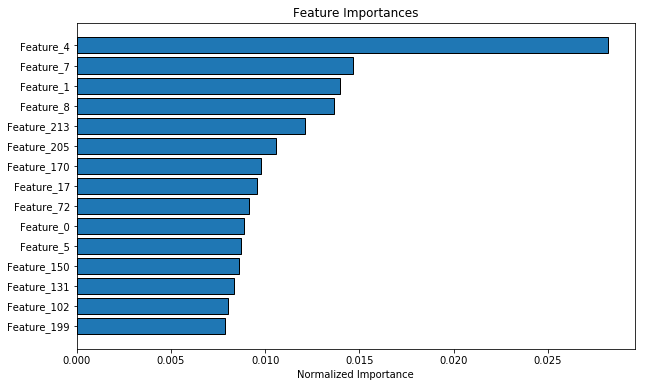

In [13]:
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})
feature_importances_sorted = plot_feature_importances(feature_importances_domain)

In [14]:
feature_importances_sorted.head(10)

,index,feature,importance,importance_normalized
0,4,Feature_4,0.028215,0.028215
1,7,Feature_7,0.014672,0.014672
2,1,Feature_1,0.013975,0.013975
3,8,Feature_8,0.013634,0.013634
4,213,Feature_213,0.012108,0.012108
5,205,Feature_205,0.010563,0.010563
6,170,Feature_170,0.009798,0.009798
7,17,Feature_17,0.009575,0.009575
8,72,Feature_72,0.009143,0.009143
9,0,Feature_0,0.008860,0.008860


In [15]:
# genera dataframe con solo le 8 colonne più rilevanti, almeno secondo il RandomForest fatto prima
topFeatures = list(feature_importances_sorted['feature'].values[:8])
topFeatures.append(ClassNameColumn)
df_top = df[topFeatures]
df_top.head()

,Feature_4,Feature_7,Feature_1,Feature_8,Feature_213,Feature_205,Feature_170,Feature_17,class
0,-0.538950,-0.651410,-2.165760,-0.538950,-0.324062,-0.186425,0.506460,0.520923,0
1,-4.129960,2.353796,-0.423772,-4.129960,-0.675833,0.431594,1.865599,-1.962875,0
2,-3.745923,2.050352,-1.269765,-3.745923,0.262639,1.138948,1.344921,-1.375925,0
3,0.746661,-1.495117,1.585997,0.746661,2.147296,1.117564,-1.720705,-1.242422,0
4,-1.129621,-0.844445,-1.812294,-1.129621,0.302349,1.537785,0.004611,-1.214936,0


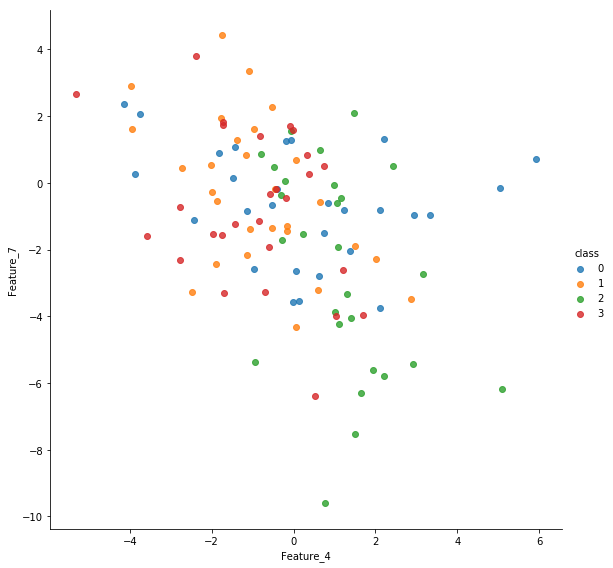

In [32]:
# rappresenta tutte le osservazioni prendendo le prime due colonne per importanza come assi
# non mi aspetto che si veda qualcosa di significativo ma pui usarlo scegliendo tu
# due colonne, le puoi passare per nome mettendo una stringa al posto di topFeatures[] tipo "Feature_4"
sns.lmplot(x=topFeatures[0], y=topFeatures[1], data=df, fit_reg=False, hue=ClassNameColumn, height=8)

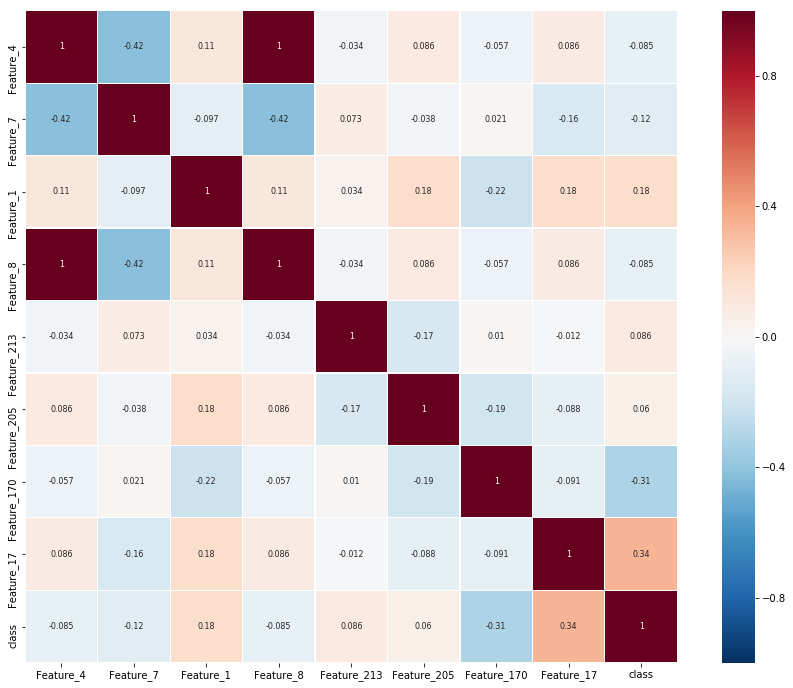

In [34]:
# Correlazione tra le feature più importanti
corr = df_top.corr()
plt.figure(figsize=(16, 12))

sns.heatmap(corr, 
            cmap='RdBu_r', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1141b6d90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1189c56d0>]], dtype=object)

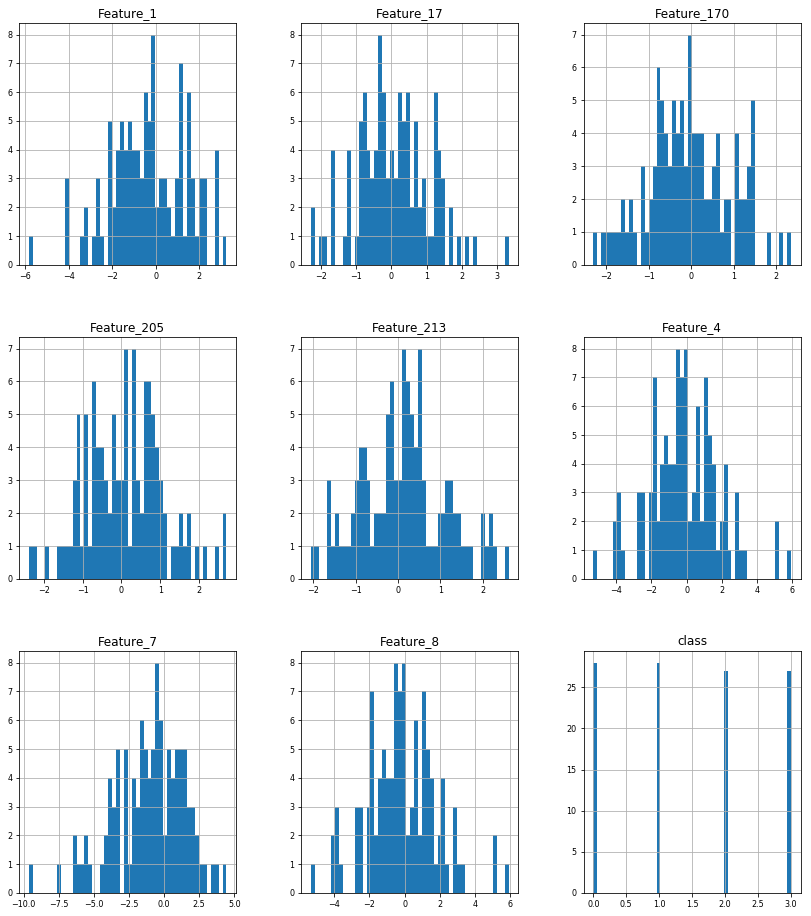

In [18]:
df_top.hist(figsize=(14, 16), bins=50, xlabelsize=8, ylabelsize=8) # istogrammi feature più rilevanti

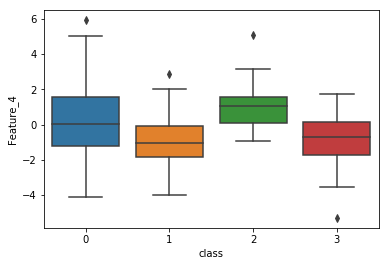

In [19]:
ax = sns.boxplot(x=ClassNameColumn, y=topFeatures[0], data=df_top) # boxplot per vedere distribuzione di una feature (puoi scegliere quella che vuoi mettendo la stringa)

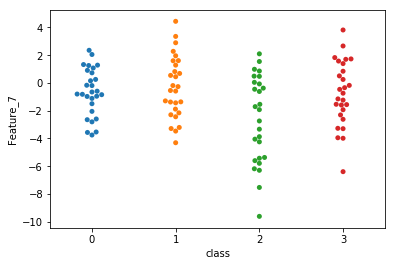

In [20]:
ax = sns.swarmplot(x=ClassNameColumn, y=topFeatures[1], data=df_top) # idem ma swarmplot e su feature diversa

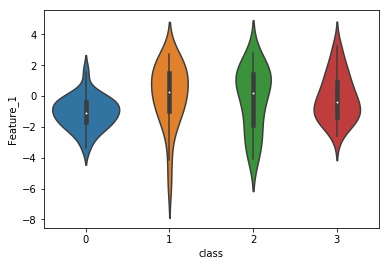

In [21]:
ax = sns.violinplot(x=ClassNameColumn, y=topFeatures[2], data=df_top) # idem ma vioinplot e su feature diversa

/Users/efumagal/anaconda3/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/efumagal/anaconda3/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/efumagal/anaconda3/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


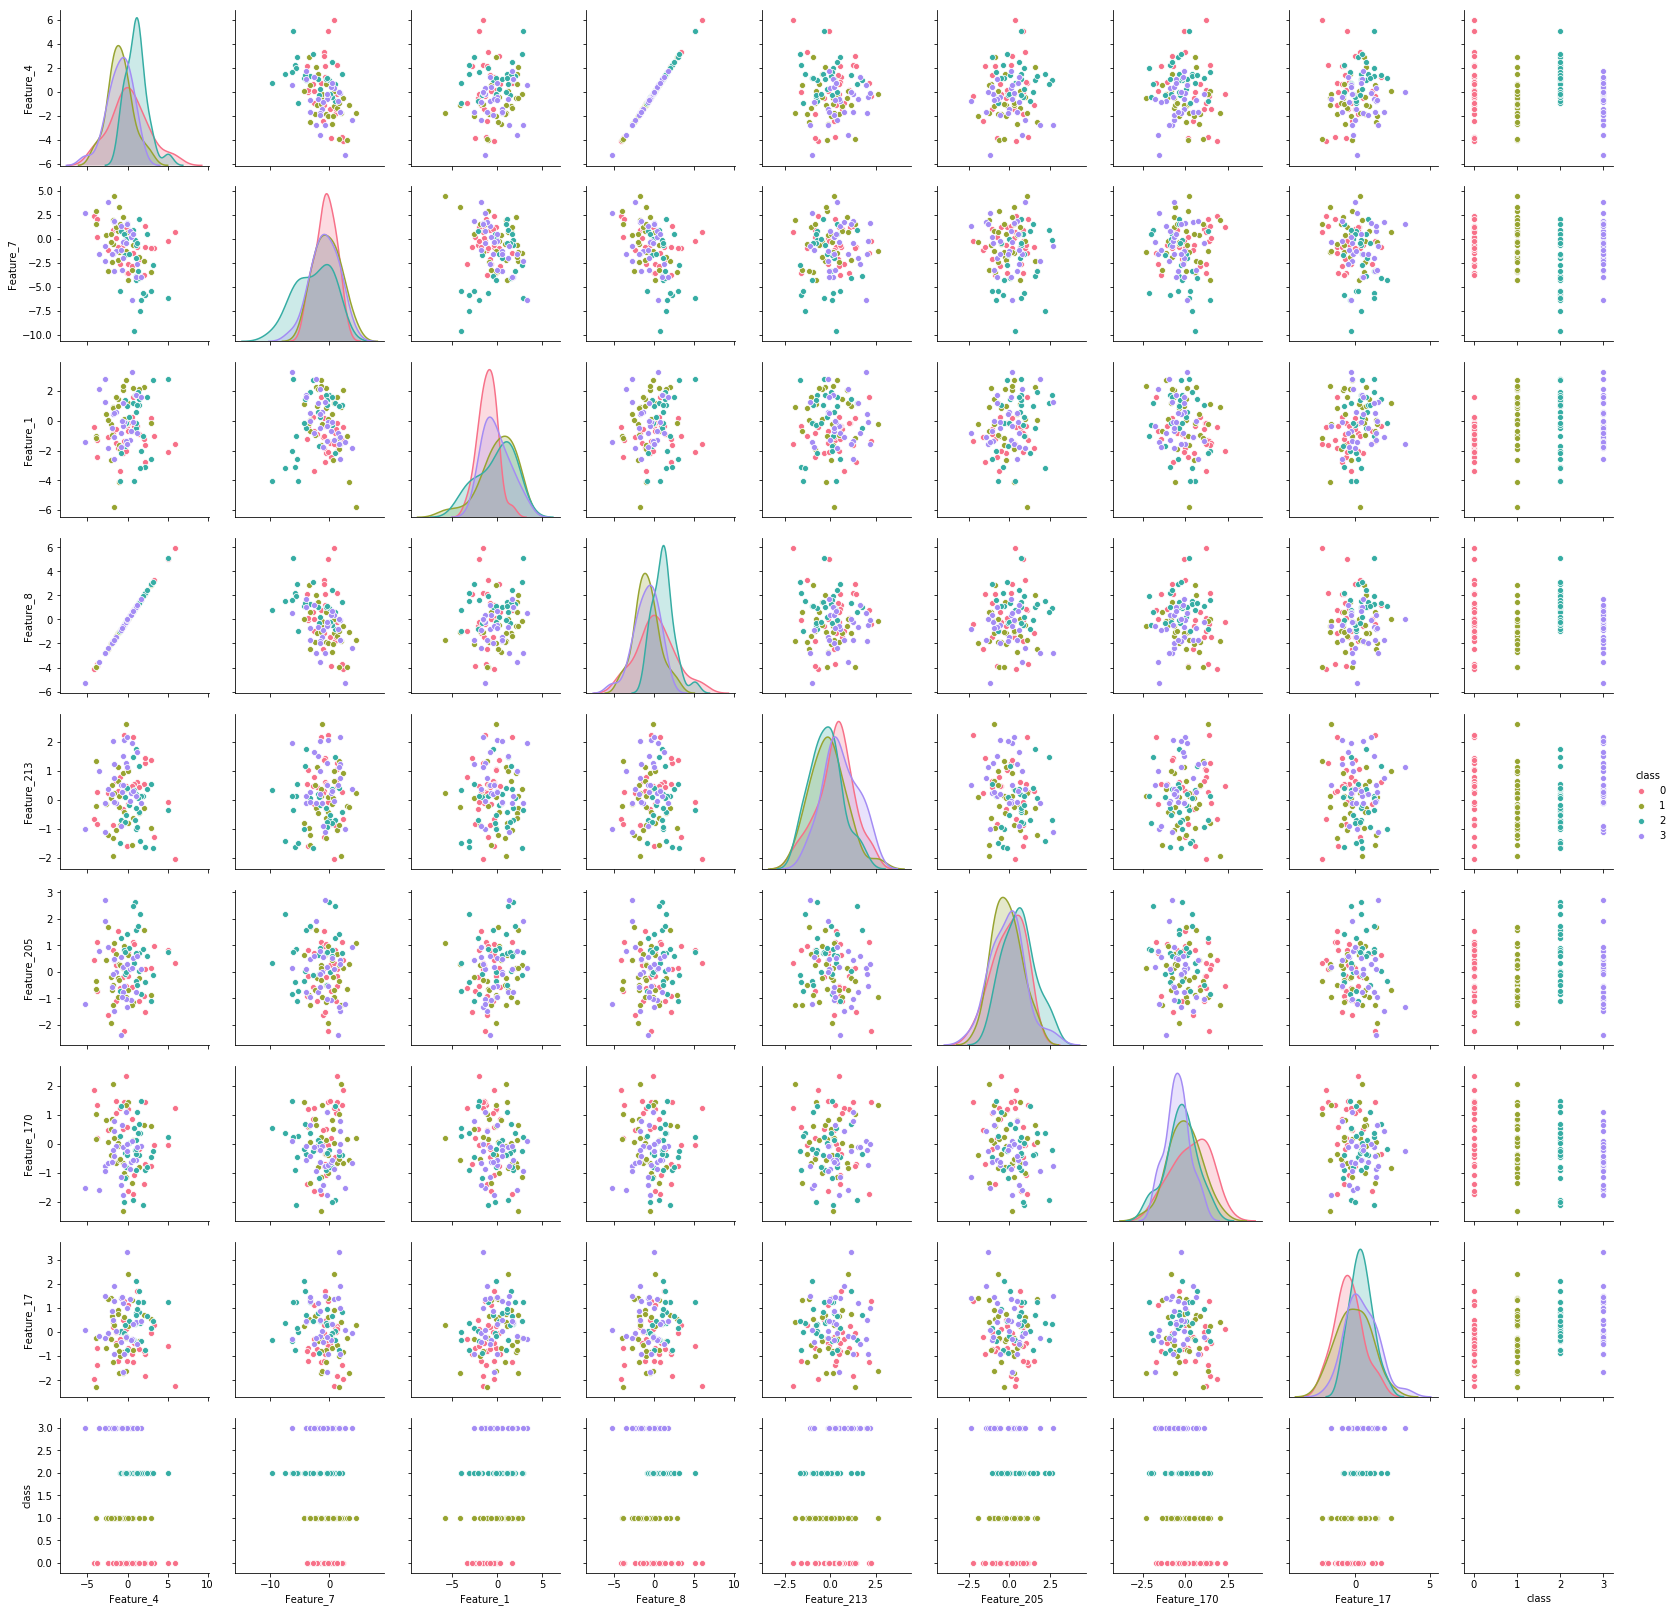

In [22]:
plot = sns.pairplot(df_top, hue=ClassNameColumn, palette='husl') # qui prende le 10 piu' importanti e genera vari scatter plot e kernel density su diagonale

In [23]:
# da qui in poi è solo per fare vedere cosa succede su un dataset ideale

In [24]:
iris = sns.load_dataset("iris")

In [25]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
domain_features = iris.drop(columns=['species']).values
train_labels = iris['species']
domain_features_names = list(iris.drop(columns=['species']).columns)
random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 0, n_jobs = -1)

# Train on the training data
random_forest_domain.fit(domain_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

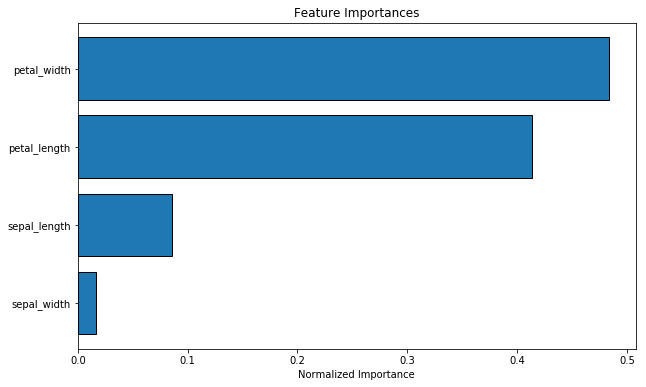

In [27]:
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})
feature_importances_sorted = plot_feature_importances(feature_importances_domain)

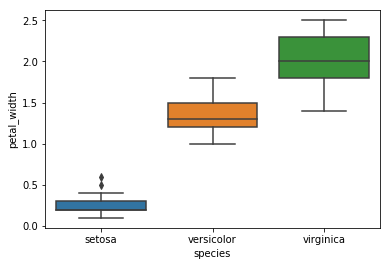

In [28]:
ax = sns.boxplot(x="species", y="petal_width", data=iris)

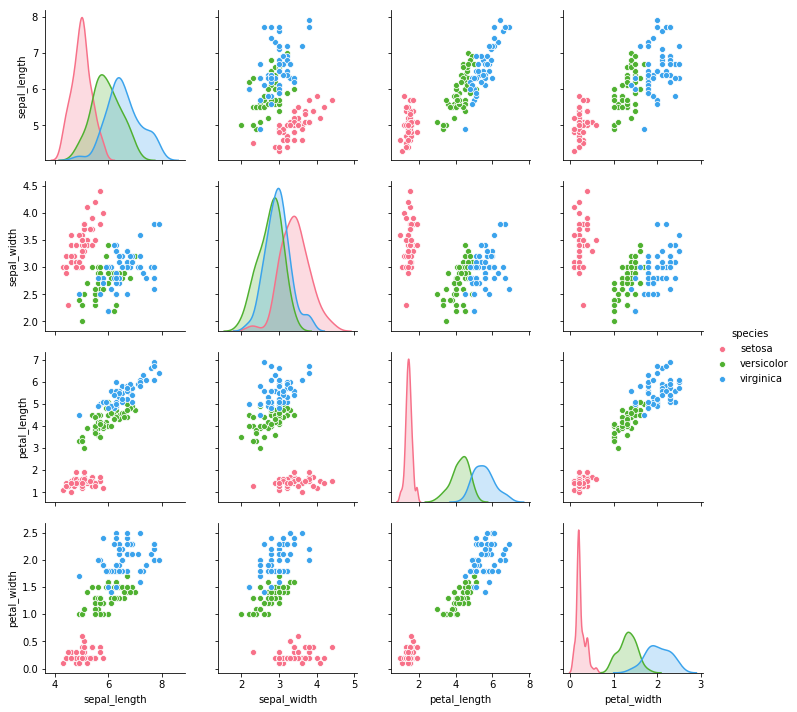

In [29]:
plot = sns.pairplot(iris, hue='species', palette='husl')

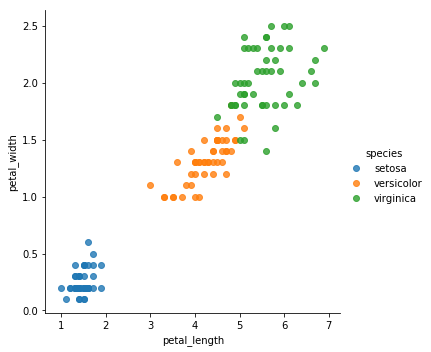

In [30]:
sns.lmplot( x="petal_length", y="petal_width", data=iris, fit_reg=False, hue='species')

In [35]:
feature_importances_sorted.head(10)

,index,feature,importance,importance_normalized
0,3,petal_width,0.484006,0.484006
1,2,petal_length,0.413191,0.413191
2,0,sepal_length,0.086182,0.086182
3,1,sepal_width,0.016622,0.016622
